# Comparative Analysis
In this notebook, we compare ClaSP with different window size detection techniques.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's choose a score for evaluation: F1.

In [3]:
eval_score = "f1_score"

Let's load the scores from the different methods.

In [4]:
wsd = ["Human", "FFT", "ACF", "SuSS", "MWF", "Autoperiod", "RobustPeriod"] # 

methods = list()

for algo in wsd:
    candidate_name = f"clasp_{algo}"
    methods.append((algo, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/segmentation/clasp/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df[eval_score]
    
df_scores

,name,Human,FFT,ACF,SuSS,MWF,Autoperiod,RobustPeriod
0,Adiac,1.000,0.500,0.500,0.500,0.500,0.500,1.000
1,ArrowHead,1.000,1.000,0.500,1.000,1.000,1.000,1.000
2,Beef,0.500,0.500,0.667,0.500,0.667,0.500,0.500
3,BeetleFly,1.000,0.500,0.667,0.500,0.500,0.500,0.500
4,BirdChicken,1.000,0.500,0.667,1.000,1.000,0.500,0.500
5,Car,0.750,0.750,0.750,0.750,0.750,0.750,0.750
6,CBF,1.000,0.400,0.400,0.400,0.000,0.400,0.500
7,ChlorineConcentration,1.000,0.500,0.500,0.500,0.500,0.500,0.500
8,CinCECGTorso,1.000,0.333,0.500,0.333,0.400,0.400,0.000
9,Coffee,1.000,1.000,1.000,1.000,1.000,1.000,0.500


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4081/3278697802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0)


Human           0.885012
FFT             0.780000
ACF             0.691181
SuSS            0.757096
MWF             0.729386
Autoperiod      0.706349
RobustPeriod    0.693012
dtype: float64

In [6]:
df_scores.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4081/4283968224.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0)


Human           0.201007
FFT             0.249677
ACF             0.255222
SuSS            0.254480
MWF             0.292705
Autoperiod      0.285599
RobustPeriod    0.309036
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

Human:wins=72 rank=1.3494
FFT:wins=50 rank=1.84337
ACF:wins=36 rank=2.80723
SuSS:wins=49 rank=2.10843
MWF:wins=45 rank=2.20482
Autoperiod:wins=40 rank=2.48193
RobustPeriod:wins=42 rank=2.86747


Let's plot and output the ranks.

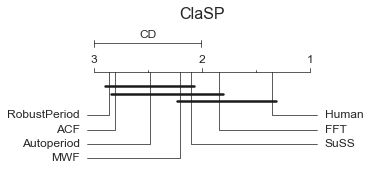

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, highv=3, width=5, reverse=True, textspace=1, )
plt.title("ClaSP", fontsize=16)
plt.show()

Let's compute wins/losses against Human.

In [12]:
selection = "Human"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

Human vs FFT: (wins/ties/losses): 26/53/4
Human vs ACF: (wins/ties/losses): 44/32/7
Human vs SuSS: (wins/ties/losses): 29/50/4
Human vs MWF: (wins/ties/losses): 33/45/5
Human vs Autoperiod: (wins/ties/losses): 37/42/4
Human vs RobustPeriod: (wins/ties/losses): 35/43/5


Lets plot the correlation of the window sizes from different techniques.

In [13]:
window_sizes = pd.read_csv("../experiments/segmentation/window_sizes.csv")

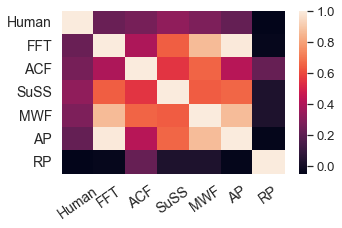

In [14]:
font_size = 14
_, ax = plt.subplots(figsize=(5,3))

from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr

W = [window_sizes.iloc[:,i].to_numpy() for i in range(2,window_sizes.columns.shape[0])]
L = list(window_sizes.columns[2:])

for idx, l in enumerate(L):
    if l == "Autoperiod":
        L[idx] = "AP"
    if l == "RobustPeriod":
        L[idx] = "RP"

corr = pairwise_distances(W, metric=lambda x,y: pearsonr(x,y)[0])

sns.set(font_scale=1.2)
ax = sns.heatmap(corr)

ax.set_xticklabels(L, rotation=35, fontsize=font_size)
ax.set_yticklabels(L, rotation=0, fontsize=font_size)

plt.show()

#### 